<a href="https://colab.research.google.com/github/AlexAlexeyuk/Researchs/blob/master/CKD_mortalyty_GBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [160]:
import pandas as pd
import numpy as np
df = pd.read_excel('/content/Стат. ИГМ ИМ.xlsx')

df.head()

,М,59,ИГМ без ФП,ПКБ,ОИМ,80,смерть,да,2,6.5,Q,да.1
0,М,56,ИГМ без ФП,ЛКБ,ОИМ,14,смерть,да,3.0,6.1,не Q,да
1,М,59,ИГМ без ФП,ЛКБ,Прогр. стенокардия,98,жизнь,да,3.0,5.7,NaN,нет
2,Ж,86,ИГМ+ФП,ЛКБ,ОИМ,57,смерть,нет,3.0,5.9,не Q,да
3,Ж,83,ИГМ+ФП,ЛКБ,Прогр. стенокардия,69,жизнь,нет,3.0,5.9,NaN,нет
4,Ж,78,ИГМ+ФП,ЛКБ,ОИМ,54,смерть,нет,2.0,5.0,не Q,нет


In [161]:
df.columns = ['Gender', 'Age', 'AF', 'Localisation', 
              'AMI_Unst.ang', 'GFR', 'Surv','Smoking',  'AH', 'Chol', 'Q_non_Q', 'DM']
df.head()

,Gender,Age,AF,Localisation,AMI_Unst.ang,GFR,Surv,Smoking,AH,Chol,Q_non_Q,DM
0,М,56,ИГМ без ФП,ЛКБ,ОИМ,14,смерть,да,3.0,6.1,не Q,да
1,М,59,ИГМ без ФП,ЛКБ,Прогр. стенокардия,98,жизнь,да,3.0,5.7,NaN,нет
2,Ж,86,ИГМ+ФП,ЛКБ,ОИМ,57,смерть,нет,3.0,5.9,не Q,да
3,Ж,83,ИГМ+ФП,ЛКБ,Прогр. стенокардия,69,жизнь,нет,3.0,5.9,NaN,нет
4,Ж,78,ИГМ+ФП,ЛКБ,ОИМ,54,смерть,нет,2.0,5.0,не Q,нет


In [162]:
Gend = {"М": 'male', "Ж": 'female'}
AF = {'ИГМ без ФП': 'No_AF', 'ИГМ+ФП': 'AF' }
IHD = {"ОИМ": "AMI", 'Прогр. стенокардия': 'Unst_ang'}
surv = {'смерть': 'death', 'жизнь': 'alive'}
df['Surv'] = df['Surv'].map(surv)
df['AF'] = df['AF'].map(AF)
df['Gender'] = df['Gender'].map(Gend)
df['AMI_Unst.ang'] = df['AMI_Unst.ang'].map(IHD)
Q_non_Q = {'не Q': 'non_Q', 'NaN': 'no_AMI' }
df['Q_non_Q'] = df['Q_non_Q'].map(Q_non_Q)
dm = {'да': 'Diabetes', 'нет': 'No_Diabetes' }
df['DM'] = df['DM'].map(dm)
loc = {'ЛКБ': 'Left_car', 'ПКБ': 'Right_car', "ВББ": 'Vertebro_bas'}
df['Localisation'] = df["Localisation"].map(loc)
df.head()

,Gender,Age,AF,Localisation,AMI_Unst.ang,GFR,Surv,Smoking,AH,Chol,Q_non_Q,DM
0,male,56,No_AF,Left_car,AMI,14,death,да,3.0,6.1,non_Q,Diabetes
1,male,59,No_AF,Left_car,Unst_ang,98,alive,да,3.0,5.7,NaN,No_Diabetes
2,female,86,AF,Left_car,AMI,57,death,нет,3.0,5.9,non_Q,Diabetes
3,female,83,AF,Left_car,Unst_ang,69,alive,нет,3.0,5.9,NaN,No_Diabetes
4,female,78,AF,Left_car,AMI,54,death,нет,2.0,5.0,non_Q,No_Diabetes


In [163]:
df.describe

<bound method NDFrame.describe of     Gender  Age     AF  Localisation  ...   AH  Chol Q_non_Q           DM
0     male   56  No_AF      Left_car  ...  3.0   6.1   non_Q     Diabetes
1     male   59  No_AF      Left_car  ...  3.0   5.7     NaN  No_Diabetes
2   female   86     AF      Left_car  ...  3.0   5.9   non_Q     Diabetes
3   female   83     AF      Left_car  ...  3.0   5.9     NaN  No_Diabetes
4   female   78     AF      Left_car  ...  2.0   5.0   non_Q  No_Diabetes
5     male   73  No_AF     Right_car  ...  2.0   5.6     NaN  No_Diabetes
6   female   76     AF     Right_car  ...  2.0   5.8     NaN     Diabetes
7     male   76     AF  Vertebro_bas  ...  2.0   5.3     NaN  No_Diabetes
8     male   78     AF      Left_car  ...  3.0   6.2     NaN     Diabetes
9   female   76  No_AF      Left_car  ...  3.0   5.5     NaN  No_Diabetes
10  female   82     AF      Left_car  ...  2.0   5.1     NaN  No_Diabetes
11    male   69     AF      Left_car  ...  3.0   5.9     NaN     Diabetes
12  

In [164]:
df.isnull().sum()

Gender           0
Age              0
AF               0
Localisation     0
AMI_Unst.ang     0
GFR              0
Surv             0
Smoking          0
AH               1
Chol            10
Q_non_Q         29
DM               0
dtype: int64

In [165]:
df["Q_non_Q"] = df["Q_non_Q"].astype('str')
df.isnull().sum()

Gender           0
Age              0
AF               0
Localisation     0
AMI_Unst.ang     0
GFR              0
Surv             0
Smoking          0
AH               1
Chol            10
Q_non_Q          0
DM               0
dtype: int64

In [166]:
df['AH'].fillna(df['AH'].value_counts().index[0], inplace=True)
df['Chol'].fillna(df['Chol'].mean(), inplace = True)


In [167]:
df.isnull().sum()

Gender          0
Age             0
AF              0
Localisation    0
AMI_Unst.ang    0
GFR             0
Surv            0
Smoking         0
AH              0
Chol            0
Q_non_Q         0
DM              0
dtype: int64

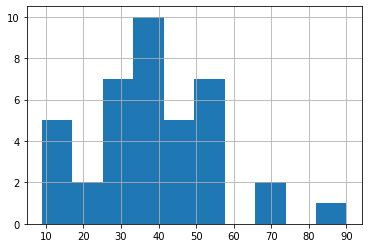

In [168]:
import matplotlib.pyplot as plt

df[df['Gender']=='female']['GFR'].hist()

In [169]:
data = df.copy()

In [170]:
!pip install sdv


In [171]:
from sdv.demo import load_tabular_demo
from sdv.tabular import GaussianCopula

#real_data = load_tabular_demo('student_placements')

model = GaussianCopula()
model.fit(df)
synthetic_data = model.sample()

/usr/local/lib/python3.6/dist-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_continuous_distns.py:4798: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/usr/local/lib/python3.6/dist-packages/scipy/optimize/optimize.py:597: RuntimeWarning: invalid value encountered in subtract
  numpy.max(numpy.abs(fsim[0] - fsim[1:])) <= fatol):
/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:1

In [172]:
!pip install h2o

In [173]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,1 hour 15 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.0.2
H2O_cluster_version_age:,10 days
H2O_cluster_name:,H2O_from_python_unknownUser_g1whcw
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.148 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [174]:
df = h2o.H2OFrame(df)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [175]:
df.head()

Gender,Age,AF,Localisation,AMI_Unst.ang,GFR,Surv,Smoking,AH,Chol,Q_non_Q,DM
male,56,No_AF,Left_car,AMI,14,death,да,3,6.1,non_Q,Diabetes
male,59,No_AF,Left_car,Unst_ang,98,alive,да,3,5.7,nan,No_Diabetes
female,86,AF,Left_car,AMI,57,death,нет,3,5.9,non_Q,Diabetes
female,83,AF,Left_car,Unst_ang,69,alive,нет,3,5.9,nan,No_Diabetes
female,78,AF,Left_car,AMI,54,death,нет,2,5,non_Q,No_Diabetes
male,73,No_AF,Right_car,AMI,86,alive,да,2,5.6,nan,No_Diabetes
female,76,AF,Right_car,AMI,12,death,нет,2,5.8,nan,Diabetes
male,76,AF,Vertebro_bas,Unst_ang,52,alive,нет,2,5.3,nan,No_Diabetes
male,78,AF,Left_car,AMI,32,death,нет,3,6.2,nan,Diabetes
female,76,No_AF,Left_car,AMI,37,death,нет,3,5.5,nan,No_Diabetes


In [176]:
synthetic_data = h2o.H2OFrame(synthetic_data)
synthetic_data.head()

Parse progress: |█████████████████████████████████████████████████████████| 100%


Gender,Age,AF,Localisation,AMI_Unst.ang,GFR,Surv,Smoking,AH,Chol,Q_non_Q,DM
female,94,AF,Left_car,AMI,55,death,нет,2.06178,5.3294,non_Q,No_Diabetes
female,92,AF,Left_car,AMI,25,death,нет,2.41272,5.87821,nan,Diabetes
female,69,No_AF,Left_car,AMI,72,alive,нет,3.41425,6.49643,nan,Diabetes
female,87,AF,Left_car,AMI,41,death,нет,2.49272,31.0409,nan,Diabetes
female,117,No_AF,Left_car,Unst_ang,51,alive,нет,2.46119,4.89267,non_Q,No_Diabetes
female,76,AF,Right_car,AMI,27,death,нет,2.28145,8.20875,nan,Diabetes
female,61,No_AF,Left_car,AMI,29,alive,нет,2.53003,4.96881,nan,Diabetes
female,65,No_AF,Left_car,AMI,40,alive,нет,2.58216,5.52729,non_Q,No_Diabetes
female,79,No_AF,Left_car,AMI,49,alive,нет,4.4213,5.90645,nan,No_Diabetes
female,75,No_AF,Left_car,AMI,33,death,нет,2.04014,5.21104,non_Q,Diabetes


In [177]:
sp1, sp2 = df.split_frame(ratios=[.6], seed=123)

In [178]:
sp_1, sp_2 = synthetic_data.split_frame(ratios=[.4], seed=123)

df.dim

[55, 12]

In [179]:
sp1.dim

[34, 12]

In [180]:
d_f = df.rbind(sp1)

In [181]:
d_f.dim



[89, 12]

In [182]:
data = d_f.rbind(sp_1)

In [183]:
data.dim

[113, 12]

In [184]:
!pip install sdv[ctgan]

In [185]:
data['Surv'] = data['Surv'].asfactor()

In [186]:
from h2o.automl import H2OAutoML


In [187]:
data = data.drop(['AH'], axis=1)
data = data.drop(['Chol'], axis=1)
data = data.drop(['Smoking'], axis=1)

In [188]:
# Set predictors and response variable
response = "Surv"
predictors = data.col_names.remove(response)


In [189]:
# split
train, test = data.split_frame(seed = 1234, 
                                  ratios = [0.75], 
                                  destination_frames = ["train.hex", "test.hex"])

In [190]:
train.col_names

['Gender',
 'Age',
 'AF',
 'Localisation',
 'AMI_Unst.ang',
 'GFR',
 'Surv',
 'Q_non_Q',
 'DM']

In [191]:
aml = H2OAutoML(max_models = 6, max_runtime_secs = 120, seed = 12345)
aml.train(x = predictors, y = response, training_frame = train, leaderboard_frame = test)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [142]:
aml_ = H2OAutoML(max_models = 6, max_runtime_secs = 120, seed = 12345)
aml_.train(x = predictors, y = response, training_frame = train, leaderboard_frame = train)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [143]:
lb = aml.leaderboard

In [144]:
lb.head(rows=5)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_1_AutoML_20201128_093527,0.895238,0.447485,0.861139,0.0714286,0.277345,0.0769205
StackedEnsemble_BestOfFamily_AutoML_20201128_093527,0.885714,0.309802,0.83683,0.0714286,0.270364,0.0730965
StackedEnsemble_AllModels_AutoML_20201128_093527,0.87619,0.353711,0.807077,0.0714286,0.306475,0.0939271
DRF_1_AutoML_20201128_093527,0.866667,0.456913,0.76872,0.0714286,0.34277,0.117491
GLM_1_AutoML_20201128_093527,0.861905,0.533078,0.819349,0.142857,0.381899,0.145847


In [146]:
aml.varimp_heatmap


<bound method varimp_heatmap of <h2o.automl.autoh2o.H2OAutoML object at 0x7fbb89f4fac8>>

In [192]:
import scipy
from scipy import stats
data = data, columns=['Gender',
 'Age',
 'AF',
 'Localisation',
 'AMI_Unst.ang',
 'GFR',
 'Surv',
 'Q_non_Q',
 'DM'])
x = data_[data_['Surv'] == 'death']['GFR']
y = data_[data_['Surv'] == 'alive']['GFR']
x.name, y.name = 'death', 'alive'

ValueError: ignored

In [159]:
y

Series([], Name: alive, dtype: float64)

In [156]:
res = stats.ttest_ind(x, y, equal_var=False)
print('p-value: ', res[1])

p-value:  nan
